In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euler(f, y0, x):
    # Funkce pro numerické řešení diferenciální rovnice pomocí Eulerovy metody.
    # f: Funkce popisující diferenciální rovnici.
    # y0: Počáteční podmínky.
    # x: Pole hodnot času.
    
    y = np.zeros((len(x), len(y0)))  # Inicializace pole pro ukládání výsledků.
    y[0] = y0  # Nastavení počátečních podmínek.
    h = x[1] - x[0]  # Výpočet délky časového kroku.
    
    # Iterace přes časové body a výpočet numerického řešení.
    for i in range(len(x) - 1):
        y[i + 1] = y[i] + f(y[i], x[i]) * h  # Eulerova metoda pro výpočet další hodnoty.
    
    return y  # Vrací pole s vypočtenými hodnotami v různých časech.

In [32]:
def main(beta=3, gamma=1, population=50, I=10, t=10):
    """Modeling disease spread. SIR model.

    Args:
        beta: Transmission rate parameter. Defaults to 3.
        gamma: Recovery rate parameter. Defaults to 1.
        population: Total population size. Defaults to 50.
        I: Initial number of infected individuals. Defaults to 10.
        t: Time duration. Defaults to 10.
    """
    S = population - I  # Počet zdravých (S)
    R = population - S - I  # Počet vyléčených (R)

    def model(y, t):
        # Funkce popisující SIR model pomocí diferenciálních rovnic.
        # y: Pole stavových proměnných [S, I, R].
        # t: Čas (není používán, protože model je časově nezávislý).
        
        dSdt = -beta * y[0] * y[1] / population  # Rovnice pro S (zdraví)
        dIdt = beta * y[0] * y[1] / population - gamma * y[1]  # Rovnice pro I (nakažení)
        dRdt = gamma * y[1]  # Rovnice pro R (vyléčení)
        return np.array([dSdt, dIdt, dRdt])  # Vrací pole s hodnotami změn stavových proměnných.

    y0 = np.array([S, I, R])  # Počáteční podmínky pro SIR model.


    time = np.linspace(0, t, 1000)  # Časové body, ve kterých se budou počítat hodnoty.


    y = euler(model, y0, time)  # Volání funkce euler pro výpočet vývoje stavových proměnných.


    susceptible = y[:, 0]  # Pole zdravých (S) v čase.
    infected = y[:, 1]  # Pole nakažených (I) v čase.
    recovered = y[:, 2]  # Pole vyléčených (R) v čase.

    plt.figure(figsize=(10, 6))
    plt.plot(time, susceptible, label='S')
    plt.plot(time, infected, label='I')
    plt.plot(time, recovered, label='R')
    plt.title('SIR model')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()



<class 'numpy.float64'>
<class 'numpy.ndarray'>


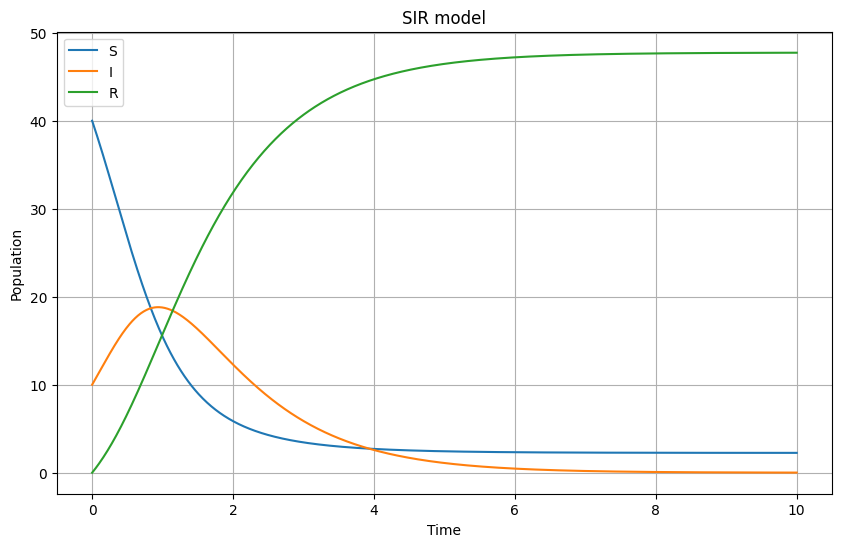

In [31]:
main()

<class 'numpy.float64'>


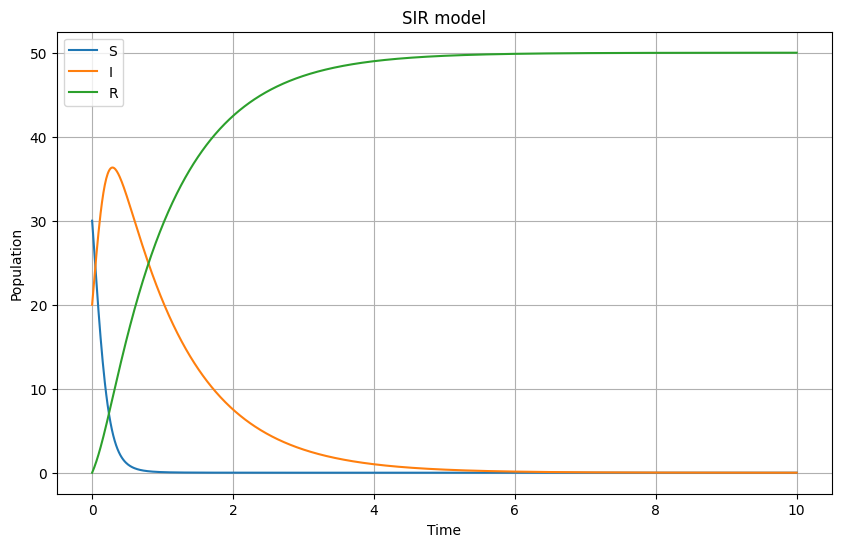

In [33]:
main(beta=10, gamma=1, I=20)

<class 'numpy.float64'>
<class 'numpy.ndarray'>


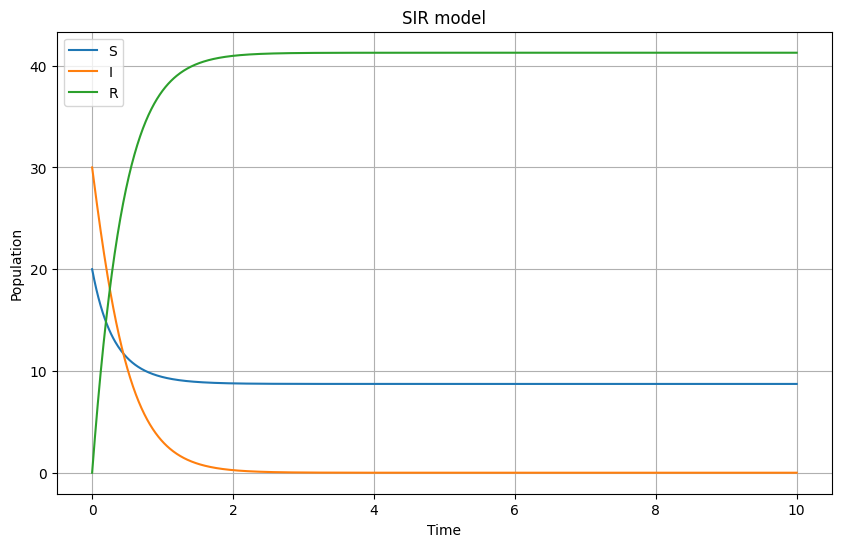

In [30]:
main(beta=3, gamma=3, I=30)
